# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#Import the dataset and visualize 
json_data = pd.read_json('data/world_bank_projects.json')
json_data.head(7)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...


In [9]:
#Generate project counts for countries and find the top 10
df = json_data['countryname'].value_counts()
df.sort_values(ascending=False).head(11)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Islamic Republic of Pakistan        9
Name: countryname, dtype: int64

11 values are shown since Africa shows up as a country when it is in fact a continent

In [10]:
#This block generates counts of projects and a dict with key-value pairs for each unique project
#in order to help with cleaning the missing values later
count_dict = {}
code_dict = {}
for row in json_data['mjtheme_namecode']:
    for thedict in row:
        if thedict['name'] != '':
            if thedict['name'] not in count_dict:
                count_dict[thedict['name']] = 1
            else:
                count_dict[thedict['name']] += 1
        if thedict['code'] not in code_dict and thedict['name'] != '':
            code_dict[int(thedict['code'])] = thedict['name']

In [11]:
#Contains counts for each unique project
count_dict

{'Human development': 197,
 'Economic management': 33,
 'Social protection and risk management': 158,
 'Trade and integration': 72,
 'Public sector governance': 184,
 'Environment and natural resources management': 223,
 'Social dev/gender/inclusion': 119,
 'Financial and private sector development': 130,
 'Rural development': 202,
 'Urban development': 47,
 'Rule of law': 12}

In [12]:
#Maps the code corresponding to the name of the project
code_dict

{8: 'Human development',
 1: 'Economic management',
 6: 'Social protection and risk management',
 5: 'Trade and integration',
 2: 'Public sector governance',
 11: 'Environment and natural resources management',
 7: 'Social dev/gender/inclusion',
 4: 'Financial and private sector development',
 10: 'Rural development',
 9: 'Urban development',
 3: 'Rule of law'}

In [13]:
#Create dataframe from dictionary of project counts, sort for top ten most numerous
df_count = pd.DataFrame.from_dict(data=count_dict,orient='index',columns=['Count'])
df_count.head(10).sort_values(by='Count',ascending=False)

,Count
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
Social dev/gender/inclusion,119
Trade and integration,72
Urban development,47
Economic management,33


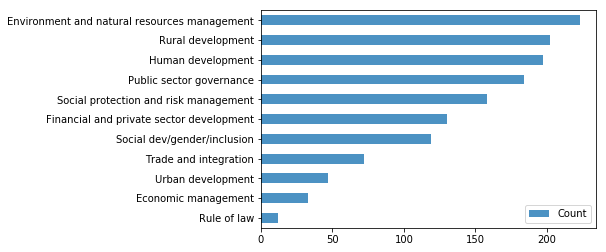

In [14]:
df_count.sort_values(by='Count').plot(kind='barh',alpha=0.8)
plt.show()

In [15]:
#Replace missing names using the code_dict key value pairs generated earlier
for row in json_data['mjtheme_namecode']:
    for index, thedict in enumerate(row):
        if thedict['name'] == '':
            row[index]['name'] = code_dict.get(thedict['code'])

In [16]:
#Generate updated count based on cleaned dataset
count_dict_clean = {}
for row in json_data['mjtheme_namecode']:
    for thedict in row:
        if thedict['name'] != '':
            if thedict['name'] not in count_dict_clean:
                count_dict_clean[thedict['name']] = 1
            else:
                count_dict_clean[thedict['name']] += 1
df_count_clean = pd.DataFrame.from_dict(data=count_dict_clean,orient='index',columns=['Count'])

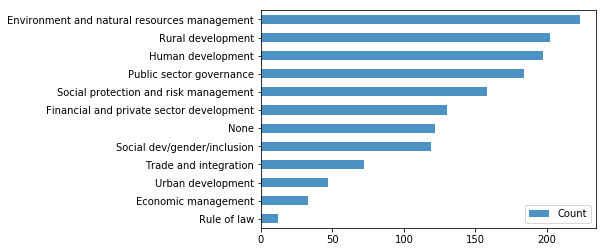

In [17]:
#Plot clean dataset
df_count_clean.sort_values(by='Count').plot(kind='barh',alpha=0.8)
plt.show()

## This second plot provides a more accurate picture of project types as all of the values are accounted for after cleaning.

In [18]:
#Let's try a cleaner version of constructing a dataframe and cleaning the data
json_data = pd.read_json('data/world_bank_projects.json')
data_list = []
#Loop through each row in the Series, convert to a Dataframe, 
#append to a list, then concatenate at the end
for row in json_data['mjtheme_namecode']:
    df = json_normalize(row)
    data_list.append(df)
df_concat = pd.concat(data_list)
df_concat.head(10)

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration
1,2,Public sector governance
2,11,Environment and natural resources management
3,6,Social protection and risk management
0,7,Social dev/gender/inclusion
1,7,Social dev/gender/inclusion


In [19]:
#Reset the index
df_concat.reset_index(drop=True).head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [20]:
#Map missing values using the previously generated code_dict
df_concat['name'] = df_concat['code'].astype(int).map(code_dict)

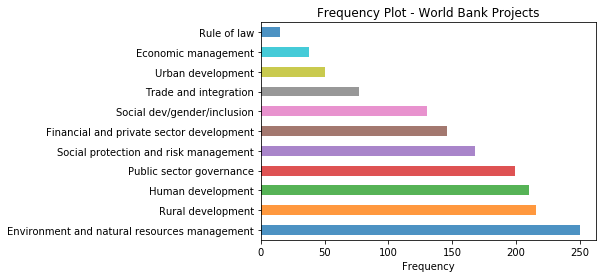

In [21]:
#Generate value_counts and plot
df_plot = df_concat['name'].value_counts()
df_plot.plot(kind='barh',alpha=0.8)
plt.title('Frequency Plot - World Bank Projects')
plt.xlabel('Frequency')
plt.show()

## Overall, the second technique used is cleaner and more pythonic. It is probably easier to read and understand too, when we aren't using a for loop to clean the data.